# Hito 2

## 1. Preliminares

A continuación se detallan las características del problema a evaluar:

### 1.1 Problema (Analizando los crímenes en la ciudad de Nueva York)

Se trabajará con datos públkicos del departamento de policía de NY. Debemos reportar los siguientes resultados:

1) Probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y a la raza

2) Modelo predictivo que prediga efectivamente si un determinado procedimiento concluirá en un arresto o nonlocal

3) Modelo predictivo para determinar si el procedimiento concluirá en una acción violenta

Para los modelos predictivos, tenemos:

* Variables objetivo: primero tenemos "arstmade" que define si se efectuó un arresto o no; y por otro lado, tenemos "was_violent" que define su el arresto tuvo caracter violento o no (se define a partir de la metodología expresa mas adelante). Dado lo anterior, identificamos que ambas V.O son variables categóricas, caracterizando el problema como uno de clasificación.

* Atributos: existen decenas de atributos principalmente categóricos que definen características del arresto. Algunas categorías globales dentro de las cuales se pueden agrupar son: periodos temporales, portación de armas, uso de la fuerza bruta, etc

### 1.2 Modelos a implementar

Dado que existen dos variables objetivo, entonces definimos los modelos a utilizar en ambos casos.

1) arstmade:

* Logistic Regression: método de clasificación que presente una fácil implementación y en general, un buen desempeño.

* KMeans: algoritmo que permite agrupar los datos en clusters, encontrando similitudes en los atributos.

* Random Forest Classifier: dado que es un buen predictor para clasificadores al promediar el desempeño de un grupo de clasificadores, e implementa un proceso de validación cruzada con un sample menor al número total de atributos disponibles; permitiendo evaluar el desempeño "out-of-bag" en cada iteración.

2) was_violent:

* Logistic Regression: método de clasificación que presente una fácil implementación y en general, un buen desempeño.

* KMeans: algoritmo que permite agrupar los datos en clusters, encontrando similitudes en los atributos.

* Linear Discriminant Analysis: algoritmo supervisado (tenemos conocimiento previo sobre la existencia de las clases y) y generativo (buscamos aprender sobre las clases a partir de los atributos X).

* Random Forest Classifier: dado que es un buen predictor para clasificadores al promediar el desempeño de un grupo de clasificadores, e implementa un proceso de validación cruzada con un sample menor al número total de atributos disponibles; permitiendo evaluar el desempeño "out-of-bag" en cada iteración.

* Gradient Boosting: algoritmo que ajusta los pesos asociados a cada atributo en cada iteración en base al error residual que esta teniendo el modelo. A medida que aumentan las iteraciones, la función objetivo acoplada en los residuos tiende a situarse cercano a cero.

Dado los algoritmos presentados anteriormente, se definen los siguientes parámetros de grilla. Es importante de notar las grillas en los modelos que se implementen para ambas predicciones serán iguales. Dado ello se definen 5 grillas, ya que son 5 modelos distintos los implementados:

*  Logistic Regression:

* KMeans:

* Linear Discriminant Analysis:

* Random Forest Classifier:

    params = {
        n_estimators = range(20, 1000, 25),
        'max_features': [None, 'log2', 'sqrt']}

* Gradient Boosting:

    param_grid = {'n_estimators': [100, 500, 1000],
                'learning_rate': [0.01, 0.1, 0.5, 1, 5, 10],
                'subsample': np.linspace(0.1, 1.0, 5, endpoint=True, dtype=float)}

### 1.3 Métricas y estrategia de división de muestras

Las métricas a utilizar para ambos problemas de clasificación serán:

* accuracy_score: define el ratio de asignaciones correctas

* roc_auc_score: curva que permite comparar la clasificación de nuestro modelo con un clasificador aleatorio

* confusion_matrix: matriz que nos permite identificar tanto las asignaciones correctas como las que no; separadas por clase

* classification_report: reporte que nos brinda el Precision (porcentaje de clasificaciones correctas entre las asignadas), Recall (porcentaje de una clase que somos capaces de identficar correctamente), F1-score (ponderacion entre Precission y Recall) y Accuracy (igual a accuracy_score) de nuestro modelo

Por otro lado, para dividir nuestro conjunto de datos utilizaremos el módulo "train_test_split()" de scikit-learn. Utilizaremos un 33% del set de datos como conjunto validador y además utilizaremos una semilla pseudo-aleatoria para poder replicar los resultados.

### 1.4 Procesamiento tentativo

* Primero que todo se detalla que se utilizarán los datos del 2009 como conjunto de entrenamiento, y los datos de 2010 como conjunto de validación

* Eliminaremos la variable "year", dado que posee un único valor. Esto implica que no es una variable informativa sino estática

* Dado que existe un gran número de variables, utilizaremos la función "create_suitable_dataframe" detallada en el archivo "preproc_nyc_sqf.py" para hacer del conjunto de datos más amigable. Esto implica transformar variables categóricas, seleccionar variables, definir la edad del individuo, entre otros

* Para las variables categóricas que poseen datos faltantes, se asignarán a la clase que no exprese la ocurrencia.

* Las medidas de distancia se transformarán a sistema métrico

* Sólo se utilizarán las observaciones de personas que sean mayores de 18 años y menores de 100

* En caso de existir variables con valores muy grandes se realizará una estandarización general con el módulo StandardScaler() de scikit-learn

* Definición de una acción violenta: cuando pf_hands, pf_wall, pf_grnd, pf_drwep, pf_ptwep, pf_baton, pf_hcuff, pf_pepsp, o pf_other; haga referencia a "yes". Es decir, cuando al menos una de las variables anteriores que hacen referencia al uso efectivo de la fuerza por parte del oficial asumiremos que hubo agresividad por alguna de las partes

## 2. Aspectos Computacionales

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re


from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

from static import *
from apoyo_prueba_2.preproc_nyc_sqf import *

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## 3. Feature Engineering

In [2]:
# lectura de datos
df = pd.read_csv('apoyo_prueba_2/2009_1perc.csv').drop('Unnamed: 0', axis=1)

### 3.1 Limpiamos el conjunto de datos

In [3]:
# eliminamos la variable year
df = df.drop('year', axis=1)

In [4]:
# aplicamos función para estructurar de mejor forma el conjunto de datos
proc_df, suitable_categorical_attributes, suitable_numerical_attributes  = create_suitable_dataframe(df)

['pct', 'ser_num', 'datestop', 'timestop', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'addrpct', 'linecm', 'detailcm', 'perobs']


### 3.2 Creamos la variable objetiv que se relaciona a la existencia de violencia en el arresto

In [5]:
# en cualquier circunstancia que hubo uso de fuerza bruta, entonces consideramos que hubo violencia en el arresto

condition = (proc_df['pf_hands'] == 'Y')|(proc_df['pf_wall'] == 'Y')|(proc_df['pf_grnd'] == 'Y')|(proc_df['pf_drwep'] == 'Y')\
    |(proc_df['pf_ptwep'] == 'Y')|(proc_df['pf_baton'] == 'Y')|(proc_df['pf_hcuff'] == 'Y')|(proc_df['pf_pepsp'] == 'Y')\
        |(proc_df['pf_other'] == 'Y')

In [6]:
proc_df['was_violent'] = np.where(condition, 1, 0)

### 3.3 Identificamos la calidad de los datos iniciales post primer pre-procesamiento

In [7]:
df_calidad = calidad_datos(proc_df)

In [8]:
print(f"Nº atributos con nulos: {df_calidad[df_calidad['porc_nulos'] > 0].shape[0]}")

Nº atributos con nulos: 0


In [9]:
df_calidad['max'].max()

12.0

Identificamos además que los valores de las variables se encuentran en un intervalo de valores similar, ya que el valor máximo entre todas es igual a 12. Esto nos da un buen inicio para no tener que normalizar los datos.

Además, no tenemos que trabajar sobre datos nulos ya que no existen.

# 4. Análisis Exploratorio

A continuación se presenta una perspectiva inicial sobre la estructura de las variables objetivo, y algunos atributos.

### 4.1 Distribución de clases en vectoes objetivo

Existen dos variables objetivo:

* arstmade
* was_violent

#### 4.1.1 Balance en clase arstmade

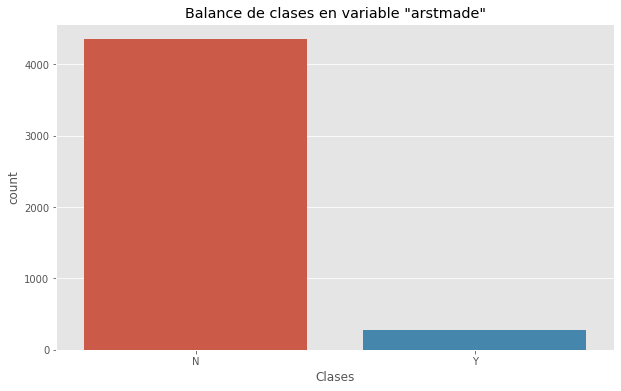

In [10]:
sns.countplot(x=proc_df['arstmade'])
plt.title('Balance de clases en variable "arstmade"')
plt.xlabel('Clases')
plt.show()

In [11]:
proc_df['arstmade'].value_counts()

N    4355
Y     281
Name: arstmade, dtype: int64

In [12]:
(proc_df['arstmade'].value_counts()[1]/proc_df['arstmade'].value_counts()[0])*100

6.452353616532721

#### 4.1.2 Balance en clase was_violent

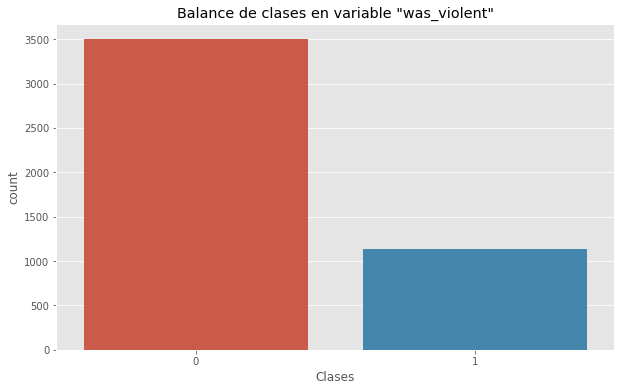

In [13]:
sns.countplot(x=proc_df['was_violent'])
plt.title('Balance de clases en variable "was_violent"')
plt.xlabel('Clases')
plt.show()

In [14]:
proc_df['was_violent'].value_counts()

0    3500
1    1136
Name: was_violent, dtype: int64

In [15]:
(proc_df['was_violent'].value_counts()[1]/proc_df['was_violent'].value_counts()[0])*100

32.457142857142856

Resultados:

* Existe un gran desbalance en la variable "arstmade". Especificamente, un ~6.5% de las veces se efectua un arresto, versus el ~93.5% de las veces que no. Esto es un gran problema para nuestro modelo, ya que tenemos muy poca información para predecir la clase 1 y, es probable; que esto se traduza en un bajo f1-score para dicha clase

* Las clases para la variable "was_violent" se encuentran levemente desbalanceadas, donde un arresto se ejecuta de forma violenta solo el ~32.4% de las veces, versus el ~67.6% que no. Dado la leve diferencia, ignoramos el desbalance

Aquí se visualizan gráficas de atributos y también, algunas relaciones entre atributos y variables objetivo.